<a href="https://colab.research.google.com/github/padolekrushna/Projects_on_ML/blob/main/end_to_end_Logistic_Reg_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('/content/placement.csv')

In [8]:
df.head()


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [10]:
df.shape

(100, 4)

In [11]:
df = df.iloc[:,1:]

In [12]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [13]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [14]:
import matplotlib.pyplot as plt


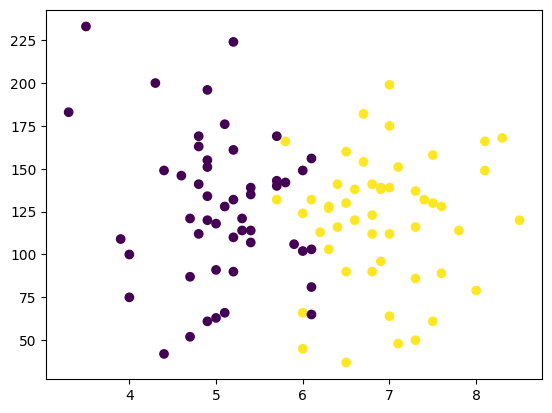

In [15]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [16]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [17]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
y.shape

(100,)

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [20]:
X_train

,cgpa,iq
30,7.6,128.0
82,6.5,37.0
25,5.0,91.0
59,4.8,112.0
96,4.4,42.0
...,...,...
78,6.1,81.0
71,6.1,132.0
45,6.0,66.0
9,5.1,66.0


In [21]:
y_train

30    1
82    1
25    0
59    0
96    0
     ..
78    0
71    1
45    1
9     0
64    1
Name: placement, Length: 90, dtype: int64

In [22]:
X_test

,cgpa,iq
98,6.3,103.0
49,5.4,135.0
54,6.4,141.0
7,5.0,63.0
18,4.0,100.0
35,6.8,90.0
76,4.9,155.0
74,6.7,154.0
75,4.8,169.0
17,3.3,183.0


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_train

array([[ 1.37658383e+00,  1.26299142e-01],
       [ 3.92599720e-01, -2.14708542e+00],
       [-9.49196791e-01, -7.98044030e-01],
       [-1.12810299e+00, -2.73416824e-01],
       [-1.48591539e+00, -2.02217418e+00],
       [ 1.28713073e+00, -1.54751147e+00],
       [-7.70290589e-01,  2.52459494e+00],
       [ 1.28713073e+00,  1.76263638e-01],
       [ 2.00275553e+00,  1.12558906e+00],
       [ 4.82052820e-01,  3.76121621e-01],
       [-1.03864989e+00,  1.82509200e+00],
       [-3.23025086e-01,  1.15057131e+00],
       [ 1.37658383e+00, -8.48008526e-01],
       [-5.46657837e-02, -5.23239303e-01],
       [-7.70290589e-01,  2.26228134e-01],
       [ 3.47873169e-02, -1.44758248e+00],
       [-8.59743690e-01,  1.32544704e+00],
       [-5.46657837e-02, -1.94722743e+00],
       [ 8.39865223e-01, -2.73416824e-01],
       [-5.91384388e-01,  4.01103869e-01],
       [ 4.82052820e-01, -7.35588410e-02],
       [-3.23025086e-01,  4.26086117e-01],
       [ 2.13693518e-01,  1.01316894e-01],
       [-5.

In [27]:
X_test = scaler.transform(X_test)

In [28]:
X_test

array([[ 0.21369352, -0.49825706],
       [-0.59138439,  0.30117488],
       [ 0.30314662,  0.45106836],
       [-0.94919679, -1.49754697],
       [-1.8437278 , -0.5732038 ],
       [ 0.66095902, -0.82302628],
       [-1.03864989,  0.80081984],
       [ 0.57150592,  0.77583759],
       [-1.12810299,  1.15057131],
       [-2.4698995 ,  1.50032278]])

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression()

In [31]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred = clf.predict(X_test)

In [33]:
y_test

98    1
49    0
54    1
7     0
18    0
35    1
76    0
74    1
75    0
17    0
Name: placement, dtype: int64

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,y_pred)

1.0

In [36]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

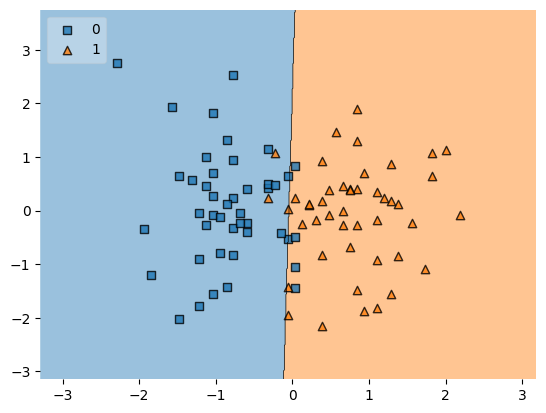

In [37]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [38]:
import pickle

In [39]:
pickle.dump(clf,open('model.pkl','wb'))